In [1]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

ModuleNotFoundError: No module named 'google.colab'

In [ ]:
!pip install numba

In [ ]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from numba import jit
PATH = 'gdrive/My Drive/VSUMM/ydata-tvsum50-v1_1/'
os.listdir(PATH)

In [ ]:
# Descomprimir los archivos
os.system('unzip '+ PATH + '/ydata-tvsum50-data.zip')
os.system('unzip '+ PATH + '/ydata-tvsum50-thumbnail.zip')

In [ ]:

info = pd.read_csv(PATH+'/data/ydata-tvsum50-info.tsv', sep='\t')
info.category = pd.Categorical(info.category)
info.head()

In [ ]:
info.info()

In [ ]:
#Convert length in float
info['minute'] = pd.to_datetime(info.length, format='%M:%S').dt.minute
info['second'] = pd.to_datetime(info.length, format='%M:%S').dt.second

In [ ]:
info.describe()

In [ ]:
sns.histplot(data=info, x='minute', kde=True)

la mayoría de los videos duran dos minutos

In [ ]:
sns.histplot(data=info, x='second',kde=True)

En su mayoría duran 20 segundos

In [ ]:
sns.histplot(data=info, x='category',kde=True)

Es igual para todas las categorías.

In [ ]:
g = sns.scatterplot(data=info, x=info.index, y=info.second)
plt.title("Second vs Index")
plt.xlabel("Index")


In [ ]:
g = sns.scatterplot(data=info, x=info.index, y=info.minute)
plt.title("minute vs Index")
plt.xlabel("Index")

In [ ]:
g = sns.violinplot(x="category",
            y="minute",
            data=info)
plt.title('Boxplot por cada categoria del video')


In [ ]:
df_query = info.groupby('category')['minute', 'second'].mean()
g=sns.stripplot(x=df_query.index, y='minute', data=df_query)
plt.title('promedio de minutos de duración de cada tipo de video')

In [ ]:
g=sns.stripplot(x=info.category, y='minute', data=info)
plt.title('Total de minutos de cada tipo de video')

La categoría Bt, en promedio dura muy poco



In [ ]:
g = sns.violinplot(x="category",
            y="second",
            data=info)
plt.title('Boxplot por cada categoria del video')


In [ ]:
g=sns.stripplot(x=df_query.index, y='second', data=df_query)
plt.title('promedio de segundos de duración de cada tipo de video')

In [ ]:
g=sns.stripplot(x=info.category, y='second', data=info)
plt.title('Total de segudos de cada tipo de video')

In [ ]:
sns.stripplot(x='minute', y='second', hue='category', data=info, dodge=True)

In [ ]:

anno = pd.read_csv(PATH+'/data/ydata-tvsum50-anno.tsv', delimiter='\t', names=['id', 'category', 'score'])
anno.category = pd.Categorical(anno.category)
anno.head()

In [ ]:
#prueba de rachas
@jit
def count_racha(array):
  racha = 0

  for i in range(array.shape[0]):
    if array[i-1] != array[i]:
      racha += 1
  return racha

def racha(str_num):
  hold_score = 3
  array = np.array(str_num.split(','), dtype=int)
  good_score = array[array>=hold_score]

  total_racha = count_racha(array) 
  racha = count_racha(good_score)
  return racha/total_racha


def percetaje(str_num):
  array = np.array(str_num.split(','), dtype=int)
  good_score = array[array>=3]
  return good_score.shape[0]/array.shape[0]
  
  



In [ ]:
anno['frecuency_score_growth_4'] = anno.score.apply(lambda x: racha(x))

In [ ]:
anno.frecuency_score_growth_4.plot()

In [ ]:
anno.frecuency_score_growth_4.describe()

In [ ]:
anno.groupby('category')['frecuency_score_growth_4'].describe()

In [ ]:
sns.lineplot(x=anno.index, y="frecuency_score_growth_4", hue="category", data =anno)

In [ ]:
prueba = np.array(anno.score.iloc[0].split(','), dtype=int)
index = np.where(prueba>=4)[0] * 2 #time in seconds
plot = pd.DataFrame(index, columns=['seconds'])
sns.lineplot(x=plot.index, y=plot.seconds)


In [ ]:
anno['per'] = anno.score.apply(lambda x: percetaje(x))

In [ ]:
anno.groupby('category')['per'].describe()

In [ ]:
sns.lineplot(x=anno.index, y="per", hue="category", data =anno)

In [ ]:
sns.histplot(data=anno, x='per')

In [ ]:
sns.boxplot(data=anno)

In [ ]:
sns.boxplot(x="category", y="per", data=anno)

In [ ]:
sns.histplot(data=anno, x='frecuency_score_growth_4')

In [ ]:
sns.boxplot(x="category", y="frecuency_score_growth_4", data=anno)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

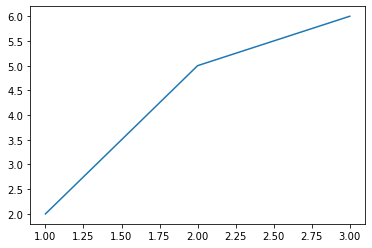

In [3]:
plt.plot([1,2,3], [2,5,6])